In [108]:
# Imports libraries 
import numpy as np
import matplotlib.pyplot as plt
import mujoco
import mujoco.viewer
import os
import mediapy as media
from tqdm import tqdm
import mujoco_viewer

# Robotics toolbox and dependencies
import roboticstoolbox as rtb
import spatialmath as sm
from spatialmath import UnitQuaternion, SE3
from spatialmath.base import q2r, r2x, rotx, roty, rotz, r2q, q2r
from mujoco_parser import MuJoCoParserClass

# Import local libraries
from Ur5e import Ur5e
from actuator import ActuatorMotor, update_actuator
from quaternion_helper import *

In [109]:
# Make ur5e instance
if 'ur5e' in locals():
    print('ur5e already exists')
    del ur5e

try:
    ur5e
except NameError:
    print('ur5e does not exist')
    ur5e = Ur5e()

ur5e already exists
ur5e does not exist


In [110]:
# Make actuator instance torque controlled
try:
    actuator
except NameError:
    actuator = ActuatorMotor()

forces_ctrl_range = np.array([[-150, 150], [-150, 150], [-150, 150], [-28, 28], [-28, 28], [-28, 28]])

for actuator_id in range(ur5e.m.nu):
    update_actuator(ur5e.m, actuator_id, actuator, ctrlrange=forces_ctrl_range[actuator_id])

In [111]:
# Visualize mujoco, Show initial state of the scene

# Use forward dynamics to get the initial state of the data
mujoco.mj_forward(ur5e.m, ur5e.d)
# render the initial state
if 'renderer' in locals():
    print('renderer already exists')
    del renderer


try:
    renderer
except NameError:
    renderer = mujoco.Renderer(ur5e.m, 480, 640)


#renderer.update_scene(ur5e.d, camera="fixed", scene_option=dict())
# show image
#media.show_image(renderer.render())

renderer already exists


# Trajectory

In [112]:
poi = np.array([
    #[93, 243],
    [500, 550],
    [130, 243],
    [130, 223],
    [175, 223],
    [175, 263],
    [130, 263],
    [130, 223],
    [175, 223],
    [175, 243],
    [213, 243],
    [213, 223],
    [254, 223],
    [254, 164],
    [334, 164],
    [334, 144],
    [379, 144],
    [379, 184],
    [334, 184],
    [334, 144],
    
])

poi = poi + np.array([0, -281])

print(poi)
#plt.plot(poi[:, 0], poi[:, 1])
#plt.show()

'''
    [379, 144],
    [379, 164],
    [663, 164],
    [663, 271],
    [648, 271],
    [648, 289],
    [663, 289],
    [663, 392],
    [379, 392],
    [379, 372],
    [334, 372],
    [334, 412],
    [379, 412],
    [379, 372],
    [334, 372],
    [334, 392],
    [254, 392],
    [254, 339],
    [213, 339],
    [213, 319],
    [175, 319],
    [175, 339],
    [130, 339],
    [130, 319],
    [93, 319],
    [130, 319],
    [130, 299],
    [175, 299],
    [175, 319],
    [213, 319],
    [213, 299],
    [297, 299],
    [297, 339],
    [213, 339],
    [213, 299],
    [297, 299],
    [297, 319],
    [334, 319],
    [334, 299],
    [379, 299],
    [379, 339],
    [334, 339],
    [334, 299],
    [379, 299],
    [379, 319],
    [435, 319],
    [435, 292],
    [444, 281],
    [480, 281],
    [480, 261],
    [525, 261],
    [525, 281],
    [565, 281],
    [565, 301],
    [648, 301],
    [648, 261],
    [565, 261],
    [565, 281],
    [525, 281],
    [525, 301],
    [480, 301],
    [480, 281],
    [444, 281],
    [435, 272],
    [425, 281],
    [435, 292],
    [444, 281],
    [435, 272],
    [435, 243],
    [379, 243],
    [379, 263],
    [334, 263],
    [334, 243],
    [297, 243],
    [297, 263],
    [213, 263],
    [213, 223],
    [297, 223],
    [297, 243],
    [334, 243],
    [334, 223],
    [379, 223],
    [379, 243]
    '''

[[ 500  269]
 [ 130  -38]
 [ 130  -58]
 [ 175  -58]
 [ 175  -18]
 [ 130  -18]
 [ 130  -58]
 [ 175  -58]
 [ 175  -38]
 [ 213  -38]
 [ 213  -58]
 [ 254  -58]
 [ 254 -117]
 [ 334 -117]
 [ 334 -137]
 [ 379 -137]
 [ 379  -97]
 [ 334  -97]
 [ 334 -137]]


'\n    [379, 144],\n    [379, 164],\n    [663, 164],\n    [663, 271],\n    [648, 271],\n    [648, 289],\n    [663, 289],\n    [663, 392],\n    [379, 392],\n    [379, 372],\n    [334, 372],\n    [334, 412],\n    [379, 412],\n    [379, 372],\n    [334, 372],\n    [334, 392],\n    [254, 392],\n    [254, 339],\n    [213, 339],\n    [213, 319],\n    [175, 319],\n    [175, 339],\n    [130, 339],\n    [130, 319],\n    [93, 319],\n    [130, 319],\n    [130, 299],\n    [175, 299],\n    [175, 319],\n    [213, 319],\n    [213, 299],\n    [297, 299],\n    [297, 339],\n    [213, 339],\n    [213, 299],\n    [297, 299],\n    [297, 319],\n    [334, 319],\n    [334, 299],\n    [379, 299],\n    [379, 339],\n    [334, 339],\n    [334, 299],\n    [379, 299],\n    [379, 319],\n    [435, 319],\n    [435, 292],\n    [444, 281],\n    [480, 281],\n    [480, 261],\n    [525, 261],\n    [525, 281],\n    [565, 281],\n    [565, 301],\n    [648, 301],\n    [648, 261],\n    [565, 261],\n    [565, 281],\n    [525, 28

In [113]:
# Generate trajectory

#startpos = np.array([0, 0, 0])
T0 = sm.SE3.Trans(0.0, 0, 0.301) * sm.SE3.RPY([0, np.pi, 0]) # sm.SE3.Trans(0.5, 0, 0.3) * sm.SE3.RPY([0, np.pi, 0]) changed z from 0.3 to 0.4 to avoid collision
T1 = sm.SE3.Trans(0.0, 0, 0.301) * sm.SE3.RPY([0, np.pi, 0])
dt = 0.002 
endTime = 0.3
n = int(endTime/dt)

if 'ctr' not in locals():
    ctr = np.array([])
    times = np.array([])
    startTime = 0
    scalingX = 5000
    scalingY = 2500
    movementX = 0.4
    movementY = 0.0



    for i in tqdm(range(0, poi.shape[0]-1)):
        distance = np.sqrt((poi[i+1, 0] - poi[i, 0])**2 + (poi[i+1, 1] - poi[i, 1])**2)
        endTime = distance*0.05
        n = int(endTime/dt)
        T0.t[0] = movementX + poi[i, 0]/scalingX
        T0.t[1] = movementY + poi[i, 1]/scalingY
        T1.t[0] = movementX + poi[i+1, 0]/scalingX
        T1.t[1] = movementY + poi[i+1, 1]/scalingY
        trajectory = rtb.ctraj(T0, T1, n)
        time = np.linspace(startTime, startTime+endTime, n)
        startTime = startTime+endTime
        if i == 0:
            ctr = trajectory
            times = time
        else:
            x = ctr.Alloc(len(ctr)+len(trajectory))
            for j in range(0, len(ctr)):
                x[j] = ctr[j]
            for j in range(0, len(trajectory)):
                x[j+len(ctr)] = trajectory[j]
            ctr = x
            times = np.append(times, time)



    #differentiate to find velocity
    velocityX = np.gradient(ctr.t[:,0])
    velocityY = np.gradient(ctr.t[:,1])
    velocityZ = np.gradient(ctr.t[:,2])

    velocity = np.transpose(np.array([velocityX, velocityY, velocityZ]))

    #differentiate to find acceleration
    accelerationX  = np.gradient(velocityX)
    accelerationY  = np.gradient(velocityY)
    accelerationZ  = np.gradient(velocityZ)

    acceleration = np.transpose(np.array([accelerationX, accelerationY, accelerationZ]))        
    print(f"No of points in trajectory: {len(ctr)}") 


In [114]:
'''
# Visualize trajectory
fig, axs = plt.subplots(1, 1, figsize=(10, 10))
axs.plot(ctr.t[:,0], ctr.t[:,1])
axs.set_title("Trajectory in XY plane")
axs.set_aspect(1)



fig, axs = plt.subplots(3, 1, figsize=(10, 10))
fig.suptitle('Pos, Velocity and Acceleration in X direction')
axs[0].plot(times, ctr.t[:,0])
axs[0].set_title('Position in X direction')
axs[1].plot(times, velocity[:,0])
axs[1].set_title('Velocity in X direction')
axs[2].plot(times, acceleration[:,0])
axs[2].set_title('Acceleration in X direction')

fig, axs = plt.subplots(3, 1, figsize=(10, 10))
fig.suptitle('Pos, Velocity and Acceleration in Y direction')
axs[0].plot(times, ctr.t[:,1])
axs[0].set_title('Position in Y direction')
axs[1].plot(times, velocity[:,1])
axs[1].set_title('Velocity in Y direction')
axs[2].plot(times, acceleration[:,1])
axs[2].set_title('Acceleration in Y direction')'''




'\n# Visualize trajectory\nfig, axs = plt.subplots(1, 1, figsize=(10, 10))\naxs.plot(ctr.t[:,0], ctr.t[:,1])\naxs.set_title("Trajectory in XY plane")\naxs.set_aspect(1)\n\n\n\nfig, axs = plt.subplots(3, 1, figsize=(10, 10))\nfig.suptitle(\'Pos, Velocity and Acceleration in X direction\')\naxs[0].plot(times, ctr.t[:,0])\naxs[0].set_title(\'Position in X direction\')\naxs[1].plot(times, velocity[:,0])\naxs[1].set_title(\'Velocity in X direction\')\naxs[2].plot(times, acceleration[:,0])\naxs[2].set_title(\'Acceleration in X direction\')\n\nfig, axs = plt.subplots(3, 1, figsize=(10, 10))\nfig.suptitle(\'Pos, Velocity and Acceleration in Y direction\')\naxs[0].plot(times, ctr.t[:,1])\naxs[0].set_title(\'Position in Y direction\')\naxs[1].plot(times, velocity[:,1])\naxs[1].set_title(\'Velocity in Y direction\')\naxs[2].plot(times, acceleration[:,1])\naxs[2].set_title(\'Acceleration in Y direction\')'

[ 0.46290785 -1.6362758  -1.859865   -1.21624817  1.57079633  2.03370418]


""

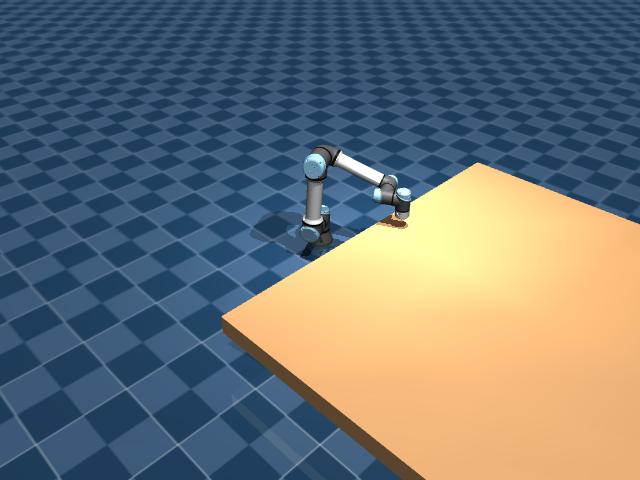

In [124]:
# Use the inverse kinematics to make a start pose for the robot
sol = ur5e.invkin(ctr[0])
print(sol.q)
# visualize the position
ur5e.d.qpos[:] = sol.q
mujoco.mj_forward(ur5e.m, ur5e.d)
renderer.update_scene(ur5e.d, camera="fixed", scene_option=dict())
# show image
media.show_image(renderer.render())
# joints pose
#[ 0.46362935 -1.63647675 -1.8596509  -1.2162613   1.57079635  2.03442568] # CBF

# Controller

In [116]:
import numpy as np
import mujoco
from tqdm import tqdm

# Define Impedance Control Matrices
STIFFNESS = np.array([5000, 5000, 5000, 250, 250, 250])  # Stiffness matrix - 5550
DAMPING_RATIO = 1  # Critical damping
DAMPING = 2 * DAMPING_RATIO * np.sqrt(STIFFNESS)
#MAX_TORQUE = np.array([150.0, 150.0, 150.0, 28.0, 28.0, 28.0])

# Compliance parameters
compliance_vector = np.array([1, 1, 1, 1, 1, 1])

# Initialize error terms
x_e = np.zeros(6)  # Position error
v_e = np.zeros(6)  # Velocity error

duration = 5  # seconds
framerate = 30  # Hz
stepsize = ur5e.m.opt.timestep
n_steps = int(np.ceil(duration / stepsize))
showVideo = True

# Logging and video capture
contact_points = []
contact_forces = []
frames = []
positions_as_quat = np.zeros((n_steps, 7))
positions_as_rpy = np.zeros((n_steps, 6))
velocities = np.zeros((n_steps, 6))
forces = np.zeros((n_steps, 6))  # Ensure forces match 6D wrench
torques = np.zeros((n_steps, 6))
target_positions_as_quat = np.zeros((n_steps, 7))
target_positions = np.zeros((n_steps, 6))
target_velocities = np.zeros((n_steps, 6))
contact_points = []
contact_forces = []
p_contacts_log = np.zeros((n_steps, 4))
time_log = []
force_log = []  # to store the first 3 components of the external force

# Reset MuJoCo Simulation
mujoco.mj_resetData(ur5e.m, ur5e.d)
ur5e.d.qpos[:] = sol.q
mujoco.mj_forward(ur5e.m, ur5e.d)

progress_bar = tqdm(total=duration)
idx = 0

while ur5e.d.time < duration and idx < n_steps:
    progress_bar.update(stepsize)
    
    # Get Cartesian position and Jacobian
    tcp_pos = ur5e.fkine(ur5e.d.qpos)
    J = ur5e.jacob0(ur5e.d.qpos)
    #dJ = ur5e.djacob0(ur5e.d.qpos, ur5e.d.qvel, representation=None)
    if(np.abs(np.linalg.det(J)) <= 0.001):
        print("Singular configuration ", ur5e.d.time, np.linalg.det(J))
        break
    # Get force at the end effector
    f_ext = np.zeros(6)
    contact_points, contact_forces, _, _, _ = ur5e.get_contact_info()
    if len(contact_forces):
        f_ext[:3] = contact_forces[0]
    '''
    # Get external force at the end effector
    contact_point = np.array([0,0,0,0])
    p_contacts,f_contacts,geom1s,geom2s,distance = ur5e.get_contact_info()

    if(len(f_contacts)):
        h_e = np.array([0.0,0.0,0.0,0.0,0.0,0.0])
        #print(f_contacts[0])
        h_e[0] = f_contacts[0][0]
        h_e[1] = f_contacts[0][1]
        h_e[2] = f_contacts[0][2]
        contact_point[0]  = p_contacts[0][0]
        contact_point[1]  = p_contacts[0][1]
        contact_point[2]  = p_contacts[0][2]
        contact_point[3]  = distance[0]
    p_contacts_log[idx] = contact_point
    
    for i in range(forces.shape[0]):
        if(forces[i,2] > 0 & i%100):
            #print("Force z", forces[i,2], "at time", i*stepsize)
            if forces[i,2] < 300:
                print("Force z", forces[i,2], "at time", i*stepsize)
                break
            break
    '''
    p_contacts, f_contacts, geom1s, geom2s, p_distance= ur5e.get_contact_info()

    for (p_contact, f_contact, geom1, geom2) in zip(p_contacts, f_contacts, geom1s, geom2s):
        for p in p_contacts:  # Store all contact points
            contact_points.append(list(p))

        contact_forces.append(list(f_contact))
    #p_contacts, f_contacts, geom1s, geom2s, p_distance = ur5e.get_contact_info()
    #for (p_contact, f_contact, geom1, geom2) in zip(p_contacts, f_contacts, geom1s, geom2s):
    #    contact_points.append(list(p_contact))  # Store X, Y, Z
    #    contact_forces.append(np.linalg.norm(f_contact))  # Store magnitude of force

    # Compute trajectory error
    target_pose = tcp_pos 
    x_diff = [0.1 * (1 - np.cos(n_steps*0.01)), 0, 0.05 * (1 - np.cos(n_steps*0.01)), 0, 0, 0]
    target_pose = tcp_pos * sm.SE3.Trans(x_diff[0], x_diff[1], x_diff[2])
    error_in_base_frame = np.concatenate((target_pose.t - tcp_pos.t, np.zeros(3)))  # Ensure 6D error

    # How it is done in URscript version (convert current pose into TCP frame, uses tcp_pos from fkin)
    error_SE3 = tcp_pos.inv() * target_pose  # Compute error in TCP frame
    error_translation = error_SE3.A[:3, 3]  # XYZ
    error_rotation = sm.SO3(error_SE3.R).rpy(order="xyz")  # Roll-pitch-yaw
    error_in_TCP_frame = np.concatenate((error_translation, error_rotation))  # Convert to NumPy
    #print("error TCP frame" ,error_in_TCP_frame)
    #print("error base frame2" ,error_in_base_frame)
    v_e = J @ ur5e.d.qvel
    
    # Compute impedance force
    wrench = STIFFNESS * error_in_base_frame - DAMPING * v_e #- f_ext
    
    # Compute joint forces
    tau = J.T @ wrench
    mass_matrix = np.zeros((6, 6))  
    mujoco.mj_fullM(ur5e.m, mass_matrix, ur5e.d.qM)
    coriolis_forces = ur5e.d.qfrc_bias.copy()  # ??
    tau += mass_matrix @ ur5e.d.qacc + coriolis_forces
    
    # Clamp torques
    #tau = np.clip(tau, -MAX_TORQUE, MAX_TORQUE)
    
    ##########################################################################################
    ##### Meget computationally heavy, kun gør hvis man har brug for x, v og a plots #########
    ##########################################################################################
    # get translational part of T_pen_array
    #p = np.zeros((len(ctr), 2))
    #for i in range(len(ctr)):
    #    p[i] = ctr[i].t[0:2]
    #p = np.hstack((p, np.zeros((len(ctr), 1)), np.ones((len(ctr), 1)), np.zeros((len(ctr), 1))))
    #dp = np.gradient(p, axis=0)
    #ddp = np.gradient(dp, axis=0)

    # Apply torque control
    ur5e.d.ctrl[:] = tau
    
    # Log data
    quat_e = r2q(tcp_pos.R)
    positions_as_quat[idx] = np.concatenate((tcp_pos.t, quat_e))
    positions_as_rpy[idx] = np.concatenate([tcp_pos.t, tcp_pos.rpy(order='xyz')])
    velocities[idx] = v_e
    forces[idx] = wrench  # Ensure correct shape
    torques[idx] = tau
    target_positions_as_quat[idx] = positions_as_quat[idx]
    target_positions[idx] = positions_as_rpy[idx]
    target_velocities[idx] = velocities[idx]
    time_log.append(ur5e.d.time)
    force_log.append(f_ext[:3])
    
    # Capture video frames
    if len(frames) < ur5e.d.time * framerate:
        renderer.update_scene(ur5e.d, camera="fixed4", scene_option=dict())
        pixels = renderer.render()
        frames.append(pixels)
    
    # Step simulation
    mujoco.mj_step(ur5e.m, ur5e.d)
    idx += 1

progress_bar.close()

# Show video
if showVideo:
    media.show_video(frames, fps=framerate)
#print(forces)

  2%|▏         | 0.10400000000000008/5 [00:00<00:04,  1.04it/s]

100%|█████████▉| 4.999999999999671/5 [00:04<00:00,  1.18it/s]  


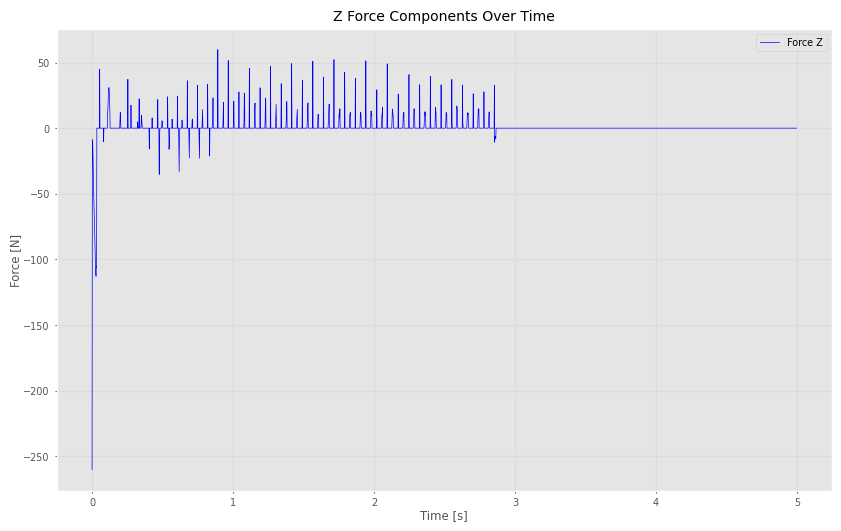

"\nplt.figure(figsize=(10, 6))\nplt.plot(time_log, force_magnitude, label='Force Magnitude', color='k')\nplt.xlabel('Time [s]')\nplt.ylabel('Force Magnitude [N]')\nplt.title('Contact Force Magnitude Over Time')\nplt.legend()\nplt.grid(True)\nplt.show()\n"

In [117]:
# Convert logs to NumPy arrays
time_log = np.array(time_log)          # shape: (n_steps,)
force_log = np.array(force_log)        # shape: (n_steps, 3)

# Optionally, compute the overall magnitude of the force vector at each step
force_magnitude = np.linalg.norm(force_log, axis=1)
plt.figure(figsize=(10, 6))
#plt.plot(time_log, force_log[:, 0], label='Force X', color='r')
#plt.plot(time_log, force_log[:, 1], label='Force Y', color='g')
plt.plot(time_log, force_log[:, 2], label='Force Z', color='b')
plt.xlabel('Time [s]')
plt.ylabel('Force [N]')
plt.title('Z Force Components Over Time')
plt.legend()
plt.grid(True)
plt.show()
'''
plt.figure(figsize=(10, 6))
plt.plot(time_log, force_magnitude, label='Force Magnitude', color='k')
plt.xlabel('Time [s]')
plt.ylabel('Force Magnitude [N]')
plt.title('Contact Force Magnitude Over Time')
plt.legend()
plt.grid(True)
plt.show()
'''

In [118]:

fig, axs = plt.subplots(6, 1, figsize=(8, 12))

axs[0].plot(torques[:,0])
axs[0].set_title('Torque joint 0')

axs[1].plot(torques[:,1])
axs[1].set_title('Torque joint 1')

axs[2].plot(torques[:,2])
axs[2].set_title('Torque joint 2')

axs[3].plot(torques[:,3])
axs[3].set_title('Torque joint 3')

axs[4].plot(torques[:,4])
axs[4].set_title('Torque joint 4')

axs[5].plot(torques[:,5])
axs[5].set_title('Torque joint 5')

plt.tight_layout()
plt.show()



KeyboardInterrupt: 

# Impedance with CBF constraining joint torques, barrier func h does not work properly

100%|█████████▉| 4.999999999999671/5 [00:06<00:00,  1.24s/it]  


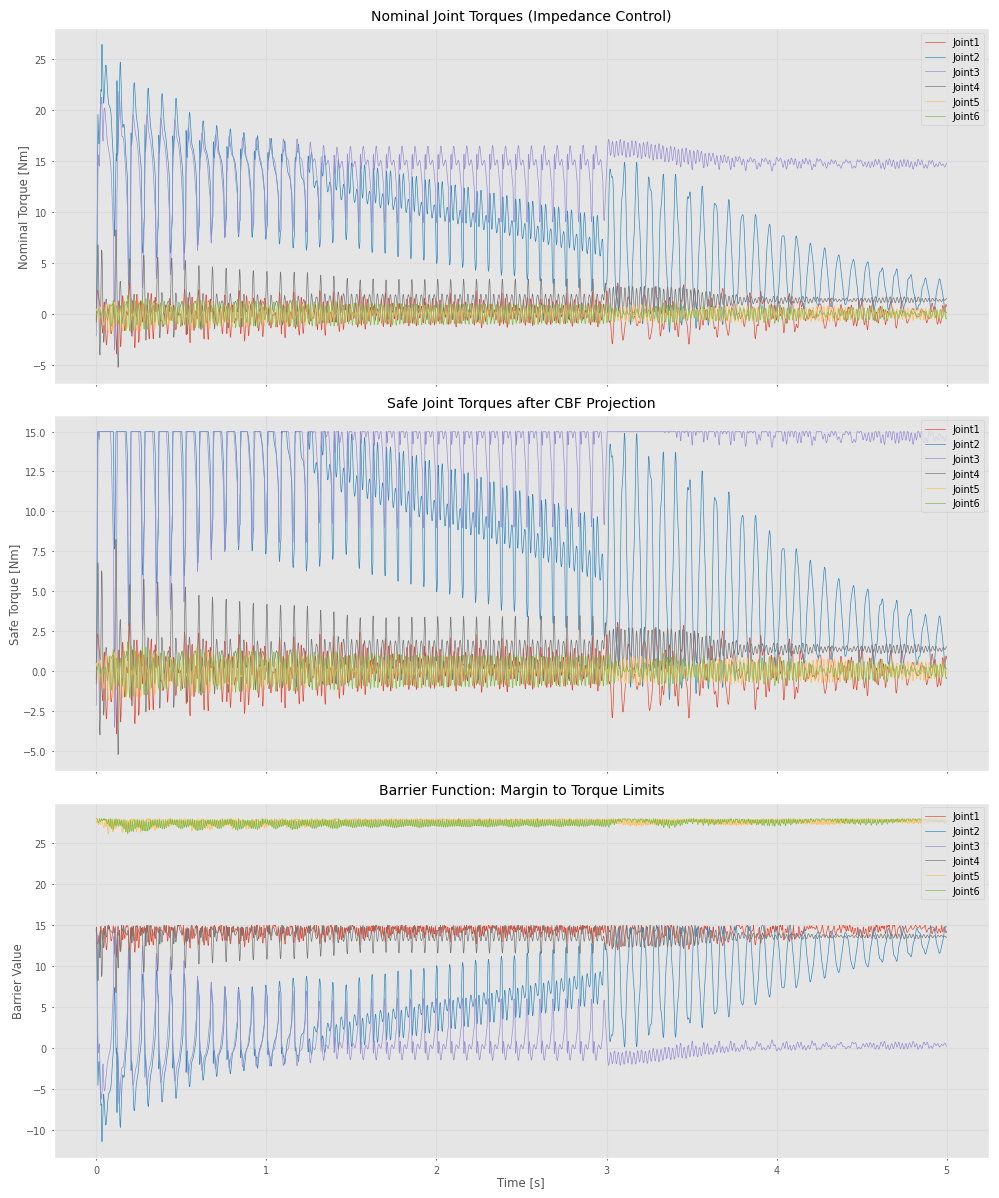

In [131]:
import numpy as np
import mujoco
from tqdm import tqdm
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

# ----------------------------------------------------------------
# CVXOPT settings: Disable solver output for cleaner logs.
solvers.options['show_progress'] = False

# ----------------------------------------------------------------
# Impedance controller parameters
STIFFNESS = np.array([5000, 5000, 5000, 250, 250, 250])
DAMPING_RATIO = 1  # Critical damping
DAMPING = 2 * DAMPING_RATIO * np.sqrt(STIFFNESS)
MAX_TORQUE = np.array([15.0, 15.0, 15.0, 15.0, 28.0, 28.0])
MIN_TORQUE = -MAX_TORQUE  # Explicit minimum torque constraint

# (Optional) compliance vector if needed
compliance_vector = np.array([1, 1, 1, 1, 1, 1])

# Simulation parameters
duration = 5         # seconds
framerate = 30       # Hz
stepsize = ur5e.m.opt.timestep  # assume defined in your simulation object
n_steps = int(np.ceil(duration / stepsize))
showVideo = True

# ----------------------------------------------------------------
# Logging arrays (6 joints)
time_log           = []
nominal_torque_log = np.zeros((n_steps, 6))
safe_torque_log    = np.zeros((n_steps, 6))
barrier_log        = np.zeros((n_steps, 6))  # per-joint margin

# (Other logging such as positions, video frames, etc. can be added as needed)
frames = []  # for video capture, if desired

# ----------------------------------------------------------------
# Reset the simulation (assuming ur5e and sol are defined in your context)
mujoco.mj_resetData(ur5e.m, ur5e.d)
ur5e.d.qpos[:] = sol.q
mujoco.mj_forward(ur5e.m, ur5e.d)

progress_bar = tqdm(total=duration)
idx = 0

def torque_cbf_projection(tau_des, MAX_TORQUE, MIN_TORQUE):
    """
    Uses CVXOPT to project the desired torque tau_des onto the safe set
    defined by the joint torque limits:
    
        MIN_TORQUE <= tau_safe <= MAX_TORQUE.
    
    The QP is formulated as:
    
        minimize   (1/2)||tau_safe - tau_des||^2
        subject to tau_safe <= MAX_TORQUE and -tau_safe <= -MIN_TORQUE.
        
    In standard QP form, the objective expands as:
        1/2 * tau_safe^T * tau_safe - tau_des^T * tau_safe  + constant.
    """
    n = tau_des.shape[0]
    P = 2 * np.eye(n)
    q = -2 * tau_des

    # Box constraints: tau_safe <= MAX_TORQUE and -tau_safe <= -MIN_TORQUE,
    # which is equivalent to: MIN_TORQUE <= tau_safe <= MAX_TORQUE.
    G = np.vstack(( np.eye(n), -np.eye(n) ))
    h = np.hstack(( MAX_TORQUE, -MIN_TORQUE ))

    # Convert to cvxopt matrices
    P_cvx = matrix(P)
    q_cvx = matrix(q)
    G_cvx = matrix(G)
    h_cvx = matrix(h)

    sol = solvers.qp(P_cvx, q_cvx, G_cvx, h_cvx)
    tau_safe = np.array(sol['x']).flatten()
    return tau_safe

# ----------------------------------------------------------------
# Main simulation loop
while ur5e.d.time < duration and idx < n_steps:
    progress_bar.update(stepsize)
    
    # Get current end-effector pose and Jacobian
    tcp_pos = ur5e.fkine(ur5e.d.qpos)
    J = ur5e.jacob0(ur5e.d.qpos)
    
    # Compute the Jacobian from the current joint positions (redundant call removed if desired)
    # J = ur5e.jacob0(ur5e.d.qpos)

    # Set a damping factor for DLS
    lambda_damp = 0.01

    # Check the conditioning of J (using its determinant as a crude measure)
    if np.abs(np.linalg.det(J)) <= 0.001:
        # Compute the damped pseudo-inverse using DLS:
        J_inv = J.T @ np.linalg.inv(J @ J.T + lambda_damp**2 * np.eye(J.shape[0]))
        print("Using damped least squares inversion at time", ur5e.d.time)
    else:
        J_inv = np.linalg.pinv(J)

    # (Optional) Get external forces (e.g., contacts)
    f_ext = np.zeros(6)
    contact_points, contact_forces, _, _, _ = ur5e.get_contact_info()
    if len(contact_forces):
        f_ext[:3] = contact_forces[0]

    # ----------------------------------------------------------------
    # Define a desired trajectory.
    t = ur5e.d.time
    #x_offset = 0.1 * (1 - np.cos(t))
    #z_offset = 0.05 * (1 - np.cos(t))
    # Assume that sm.SE3.Trans creates a translation transform.
    #target_pose = tcp_pos * sm.SE3.Trans(x_offset, 0, z_offset)
    # Compute trajectory error
    target_pose = tcp_pos 
    x_diff = [0.1 * (1 - np.cos(n_steps*0.01)), 0, 0.05 * (1 - np.cos(n_steps*0.01)), 0, 0, 0]
    target_pose = tcp_pos * sm.SE3.Trans(x_diff[0], x_diff[1], x_diff[2])
    error_in_base_frame = np.concatenate((target_pose.t - tcp_pos.t, np.zeros(3)))  # Ensure 6D error
    
    # Compute error in base frame (only translation error is considered here)
    #error_translation = target_pose.t - tcp_pos.t
    #error_in_base_frame = np.concatenate((error_translation, np.zeros(3)))
    
    # Cartesian velocity error computed from joint velocities
    v_e = J @ ur5e.d.qvel
    
    # ----------------------------------------------------------------
    # Compute impedance wrench and nominal joint torques.
    wrench = STIFFNESS * error_in_base_frame - DAMPING * v_e
    tau_nominal = J.T @ wrench

    # Optionally add dynamics compensation:
    mass_matrix = np.zeros((6, 6))
    mujoco.mj_fullM(ur5e.m, mass_matrix, ur5e.d.qM)
    coriolis_forces = ur5e.d.qfrc_bias.copy()
    tau_nominal += mass_matrix @ ur5e.d.qacc + coriolis_forces

    # ----------------------------------------------------------------
    # Apply CVXOPT-based CBF to get safe torques.
    tau_safe = torque_cbf_projection(tau_nominal, MAX_TORQUE, MIN_TORQUE)
    
    # Compute the barrier function value per joint.
    barrier = MAX_TORQUE - np.abs(tau_nominal)
    
    # ----------------------------------------------------------------
    # Log the data
    time_log.append(t)
    nominal_torque_log[idx] = tau_nominal
    safe_torque_log[idx] = tau_safe
    barrier_log[idx] = barrier

    # Apply the safe torque command to the simulation.
    ur5e.d.ctrl[:] = tau_safe

    # (Optional) Capture video frame if desired.
    if len(frames) < ur5e.d.time * framerate:
        renderer.update_scene(ur5e.d, camera="fixed4", scene_option=dict())
        pixels = renderer.render()
        frames.append(pixels)

    # Step simulation and increment counter.
    mujoco.mj_step(ur5e.m, ur5e.d)
    idx += 1

progress_bar.close()

# ----------------------------------------------------------------
# Plot the logged results using matplotlib
time_log = np.array(time_log)
joint_labels = ['Joint1', 'Joint2', 'Joint3', 'Joint4', 'Joint5', 'Joint6']

fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Plot nominal torques (from the impedance controller)
for i in range(6):
    axs[0].plot(time_log, nominal_torque_log[:len(time_log), i], label=joint_labels[i])
axs[0].set_ylabel('Nominal Torque [Nm]')
axs[0].set_title('Nominal Joint Torques (Impedance Control)')
axs[0].legend(loc='upper right')

# Plot safe torques (after CBF projection)
for i in range(6):
    axs[1].plot(time_log, safe_torque_log[:len(time_log), i], label=joint_labels[i])
axs[1].set_ylabel('Safe Torque [Nm]')
axs[1].set_title('Safe Joint Torques after CBF Projection')
axs[1].legend(loc='upper right')

# Plot the barrier function values (margin to the torque limits)
for i in range(6):
    axs[2].plot(time_log, barrier_log[:len(time_log), i], label=joint_labels[i])
axs[2].set_ylabel('Barrier Value')
axs[2].set_xlabel('Time [s]')
axs[2].set_title('Barrier Function: Margin to Torque Limits')
axs[2].legend(loc='upper right')

plt.tight_layout()
plt.show()

# ----------------------------------------------------------------
# Optionally, show the recorded video
if showVideo:
    media.show_video(frames, fps=framerate)


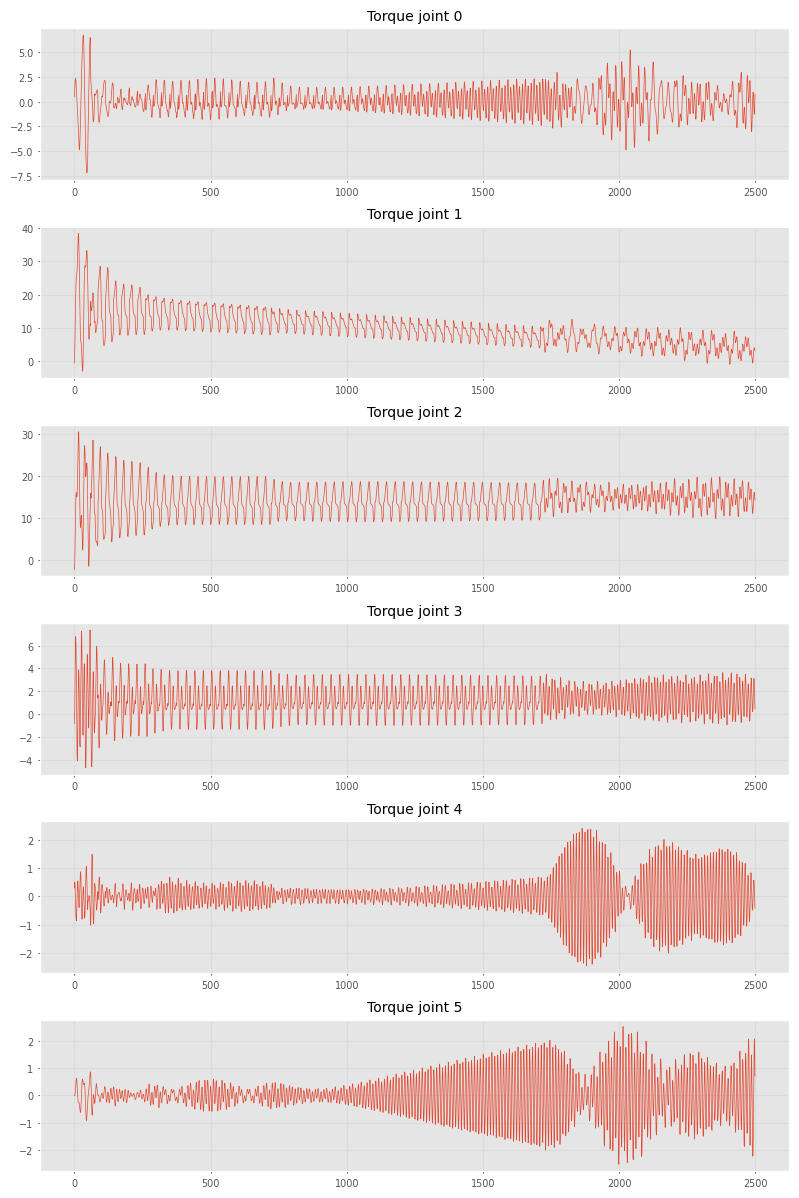

In [ ]:
# Plotting: Nominal Torques, Safe Torques, and Barrier Function h
# -------------------------------
time_array = np.array(time_log)

# For demonstration, we plot data for joint 1 (index 0). You can extend to all joints.
plt.figure(figsize=(12, 8))

# Plot nominal and safe torques for joint 1
plt.subplot(2,1,1)
plt.plot(time_array, tau_nom_log[:,1], 'b-', label='Nominal Torque (Joint 1)')
plt.plot(time_array, tau_safe_log[:,1], 'r--', label='Safe Torque (Joint 1)')
plt.ylabel('Torque [Nm]')
plt.title('Nominal vs. Safe Torques (Joint 1)')
plt.legend()
plt.grid(True)

# Plot barrier function h for joint 1: h = MAX_TORQUE[0] - safe torque.
plt.subplot(2,1,2)
plt.plot(time_array, h_log[:,1], 'g-', label='Barrier h = MAX_TORQUE - Safe Torque (Joint 1)')
plt.xlabel('Time [s]')
plt.ylabel('h [Nm]')
plt.title('Barrier Function h (Joint 1)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# For demonstration, we plot data for joint 1 (index 0). You can extend to all joints.
plt.figure(figsize=(12, 8))

# Plot nominal and safe torques for joint 1
plt.subplot(2,1,1)
plt.plot(time_array, tau_nom_log[:,2], 'b-', label='Nominal Torque (Joint 1)')
plt.plot(time_array, tau_safe_log[:,2], 'r--', label='Safe Torque (Joint 1)')
plt.ylabel('Torque [Nm]')
plt.title('Nominal vs. Safe Torques (Joint 1)')
plt.legend()
plt.grid(True)

# Plot barrier function h for joint 1: h = MAX_TORQUE[0] - safe torque.
plt.subplot(2,1,2)
plt.plot(time_array, h_log[:,2], 'g-', label='Barrier h = MAX_TORQUE - Safe Torque (Joint 1)')
plt.xlabel('Time [s]')
plt.ylabel('h [Nm]')
plt.title('Barrier Function h (Joint 1)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


(2500, 6)


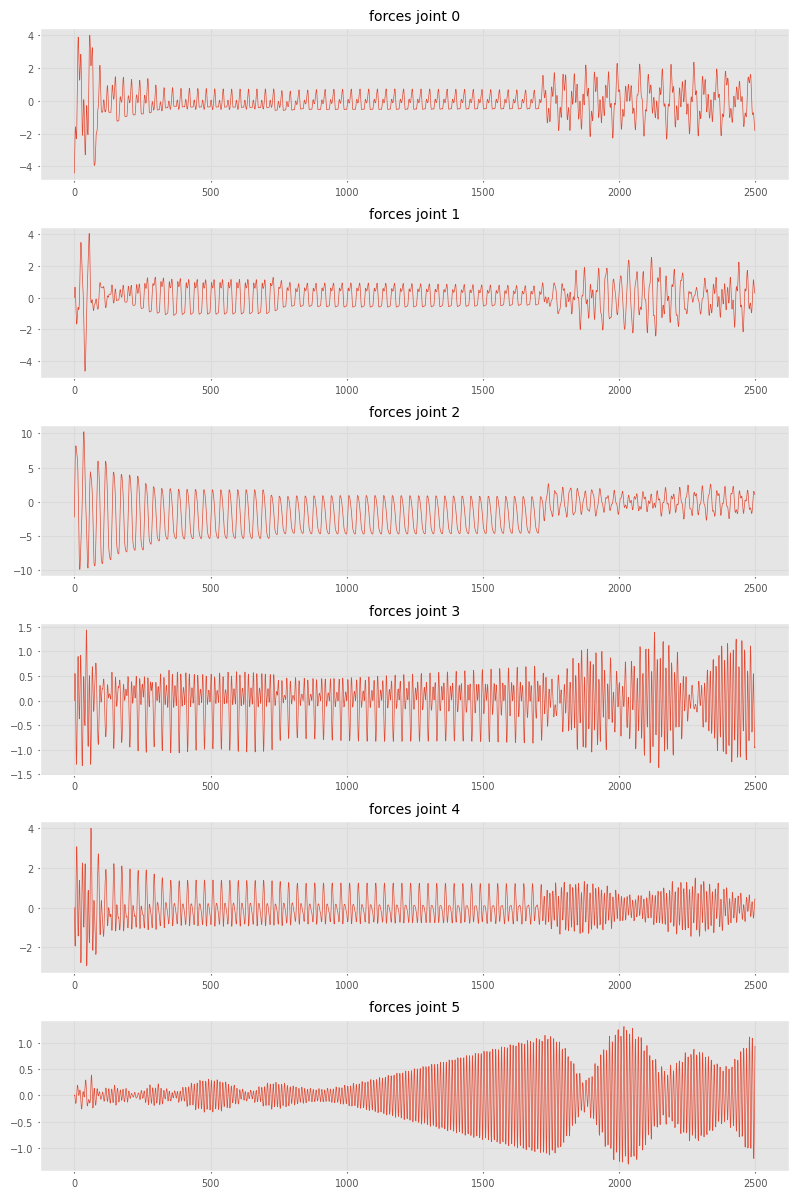

In [ ]:
import pandas as pd

# Create a time array based on simulation steps
time = np.linspace(0, duration, n_steps)

# Convert forces into a DataFrame
#force_columns = ["Force_X", "Force_Y", "Force_Z", "Torque_X", "Torque_Y", "Torque_Z"]
#force_df = pd.DataFrame(forces, columns=force_columns)
#force_df["Time"] = time  # Add time column

# Save to CSV
#force_df.to_csv("logged_forces.csv", index=False)

# Print a preview of the data
#print(force_df.head())

import matplotlib.pyplot as plt

# Ensure time is a 1D NumPy array
#ime = force_df["Time"].to_numpy()

fig, axs = plt.subplots(6, 1, figsize=(8, 12))
# print size of forces
print(forces.shape)
axs[0].plot(forces[:,0])
axs[0].set_title('forces joint 0')

axs[1].plot(forces[:,1])
axs[1].set_title('forces joint 1')

axs[2].plot(forces[:,2])
axs[2].set_title('forces joint 2')

axs[3].plot(forces[:,3])
axs[3].set_title('forces joint 3')

axs[4].plot(forces[:,4])
axs[4].set_title('forces joint 4')

axs[5].plot(forces[:,5])
axs[5].set_title('forces joint 5')

plt.tight_layout()
plt.show()



# Imp following rajec CBF constraint f_z

100%|█████████▉| 4.999999999999671/5 [00:05<00:00,  1.14s/it]  


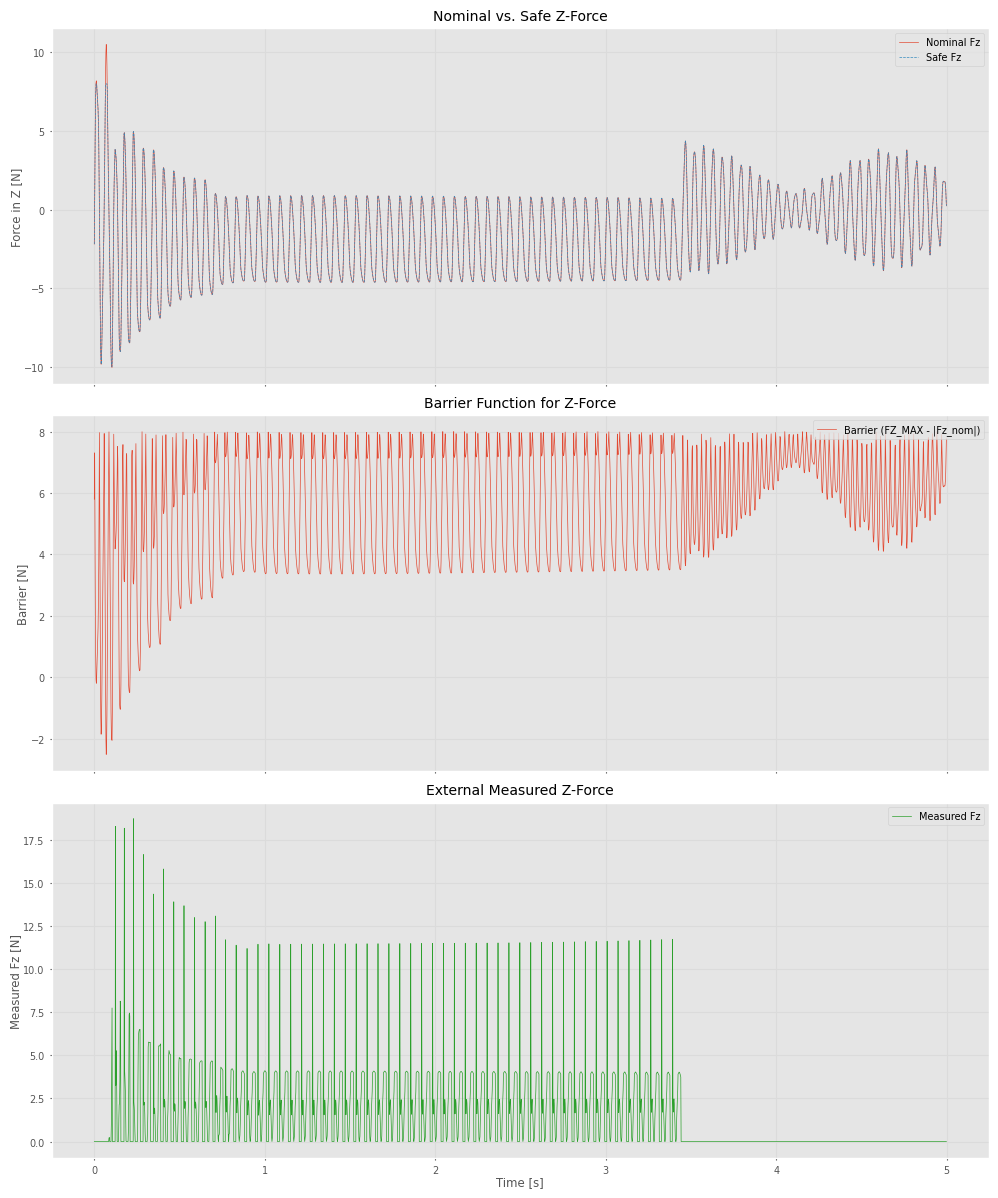

In [140]:
import numpy as np
import mujoco
from tqdm import tqdm
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

# ----------------------------------------------------------------
# CVXOPT settings: Disable solver output for cleaner logs.
solvers.options['show_progress'] = False

# ----------------------------------------------------------------
# Impedance controller parameters
STIFFNESS = np.array([5000, 5000, 5000, 250, 250, 250])
DAMPING_RATIO = 1  # Critical damping
DAMPING = 2 * DAMPING_RATIO * np.sqrt(STIFFNESS)

# Define safe limits for the z-force
FZ_MAX = 8.0   # maximum allowable force in z-direction [N]
FZ_MIN = -10.0  # minimum allowable force in z-direction [N]

# (Optional) compliance vector if needed
compliance_vector = np.array([1, 1, 1, 1, 1, 1])

# Simulation parameters
duration = 5         # seconds
framerate = 30       # Hz
stepsize = ur5e.m.opt.timestep  # assume defined in your simulation object
n_steps = int(np.ceil(duration / stepsize))
showVideo = True

# ----------------------------------------------------------------
# Logging arrays for z-force and external force measurements
time_log    = []
Fz_nom_log  = np.zeros(n_steps)   # nominal z-force from impedance controller
Fz_safe_log = np.zeros(n_steps)   # safe (projected) z-force
barrier_log = np.zeros(n_steps)    # barrier function: FZ_MAX - |Fz_nominal|
force_log   = np.zeros((n_steps, 3))  # log external force vector (x,y,z)

# (Other logging such as video frames can be added as needed)
frames = []  # for video capture, if desired

# ----------------------------------------------------------------
# Reset the simulation (assuming ur5e and sol are defined in your context)
mujoco.mj_resetData(ur5e.m, ur5e.d)
ur5e.d.qpos[:] = sol.q
mujoco.mj_forward(ur5e.m, ur5e.d)

progress_bar = tqdm(total=duration)
idx = 0

def force_z_cbf_projection(Fz_des, FZ_MAX, FZ_MIN):
    """
    Uses CVXOPT to project the desired z-force Fz_des onto the safe set:
    
         FZ_MIN <= Fz_safe <= FZ_MAX.
    
    The QP is formulated as:
    
         minimize   (1/2)*(Fz_safe - Fz_des)^2
         subject to Fz_safe <= FZ_MAX and -Fz_safe <= -FZ_MIN.
    
    This returns the safe z-force that is as close as possible to Fz_des.
    """
    n = 1  # scalar problem
    P = 2 * np.eye(n)
    q = -2 * np.array([Fz_des])
    # Constraints: Fz_safe <= FZ_MAX and -Fz_safe <= -FZ_MIN  (i.e. Fz_safe >= FZ_MIN)
    G = np.vstack(( np.array([[1.0]]), np.array([[-1.0]]) ))
    h = np.hstack(( np.array([FZ_MAX]), np.array([-FZ_MIN]) ))
    
    # Convert to cvxopt matrices
    P_cvx = matrix(P)
    q_cvx = matrix(q)
    G_cvx = matrix(G)
    h_cvx = matrix(h)
    
    sol = solvers.qp(P_cvx, q_cvx, G_cvx, h_cvx)
    Fz_safe = np.array(sol['x']).flatten()[0]
    return Fz_safe

# ----------------------------------------------------------------
# Main simulation loop
while ur5e.d.time < duration and idx < n_steps:
    progress_bar.update(stepsize)
    
    # Get current end-effector pose and Jacobian
    tcp_pos = ur5e.fkine(ur5e.d.qpos)
    J = ur5e.jacob0(ur5e.d.qpos)
    
    # Set a damping factor for DLS (for robust inversion if needed)
    lambda_damp = 0.01
    if np.abs(np.linalg.det(J)) <= 0.001:
        # Compute the damped pseudo-inverse using DLS:
        J_inv = J.T @ np.linalg.inv(J @ J.T + lambda_damp**2 * np.eye(J.shape[0]))
        print("Using damped least squares inversion at time", ur5e.d.time)
    else:
        J_inv = np.linalg.pinv(J)

    # (Optional) Get external forces (e.g., contacts) and log them.
    f_ext = np.zeros(6)
    contact_points, contact_forces, _, _, _ = ur5e.get_contact_info()
    if len(contact_forces):
        f_ext[:3] = contact_forces[0]
    force_log[idx] = f_ext[:3]

    # ----------------------------------------------------------------
    # Define a desired trajectory.
    t = ur5e.d.time
    # Start with the current pose as baseline and add a translation offset.
    target_pose = tcp_pos 
    x_diff = [0.1 * (1 - np.cos(n_steps*0.01)), 0, 0.05 * (1 - np.cos(n_steps*0.01)), 0, 0, 0]
    target_pose = tcp_pos * sm.SE3.Trans(x_diff[0], x_diff[1], x_diff[2])
    error_in_base_frame = np.concatenate((target_pose.t - tcp_pos.t, np.zeros(3)))  # Ensure 6D error

    # Cartesian velocity error computed from joint velocities
    v_e = J @ ur5e.d.qvel

    # ----------------------------------------------------------------
    # Compute impedance wrench.
    wrench = STIFFNESS * error_in_base_frame - DAMPING * v_e
    # Extract the nominal z-force (3rd element, index 2)
    Fz_nominal = wrench[2]
    
    # Project the nominal z-force to be within safe limits.
    Fz_safe = force_z_cbf_projection(Fz_nominal, FZ_MAX, FZ_MIN)
    
    # Build a safe wrench by replacing only the z-force component.
    wrench_safe = wrench.copy()
    wrench_safe[2] = Fz_safe
    
    # Compute joint torques from the safe wrench.
    tau = J.T @ wrench_safe
    mass_matrix = np.zeros((6, 6))
    mujoco.mj_fullM(ur5e.m, mass_matrix, ur5e.d.qM)
    coriolis_forces = ur5e.d.qfrc_bias.copy()
    tau += mass_matrix @ ur5e.d.qacc + coriolis_forces

    # ----------------------------------------------------------------
    # Log the data
    time_log.append(t)
    Fz_nom_log[idx]  = Fz_nominal
    Fz_safe_log[idx] = Fz_safe
    # Barrier function: margin = FZ_MAX - |Fz_nominal|
    barrier_log[idx] = FZ_MAX - np.abs(Fz_nominal)

    # Apply the joint torque command.
    ur5e.d.ctrl[:] = tau

    # (Optional) Capture video frame if desired.
    if len(frames) < ur5e.d.time * framerate:
        renderer.update_scene(ur5e.d, camera="fixed4", scene_option=dict())
        pixels = renderer.render()
        frames.append(pixels)

    # Step simulation and increment counter.
    mujoco.mj_step(ur5e.m, ur5e.d)
    idx += 1

progress_bar.close()

# ----------------------------------------------------------------
# Plot the results.
time_log = np.array(time_log)

fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Subplot 1: Nominal z-force and Safe z-force
axs[0].plot(time_log, Fz_nom_log, label='Nominal Fz')
axs[0].plot(time_log, Fz_safe_log, label='Safe Fz', linestyle='--')
axs[0].set_ylabel('Force in Z [N]')
axs[0].set_title('Nominal vs. Safe Z-Force')
axs[0].legend(loc='upper right')

# Subplot 2: Barrier function
axs[1].plot(time_log, barrier_log, label='Barrier (FZ_MAX - |Fz_nom|)')
axs[1].set_ylabel('Barrier [N]')
axs[1].set_title('Barrier Function for Z-Force')
axs[1].legend(loc='upper right')

# Subplot 3: External measured z-force (force_log[:,2])
axs[2].plot(time_log, force_log[:len(time_log), 2], label='Measured Fz', color='tab:green')
axs[2].set_ylabel('Measured Fz [N]')
axs[2].set_xlabel('Time [s]')
axs[2].set_title('External Measured Z-Force')
axs[2].legend(loc='upper right')

plt.tight_layout()
plt.show()

# ----------------------------------------------------------------
# Optionally, show the recorded video
if showVideo:
    media.show_video(frames, fps=framerate)


# CBF with Lg Lf

  1%|▏         | 0.07200000000000005/5 [00:00<00:07,  1.61s/it]

100%|█████████▉| 4.999999999999671/5 [00:06<00:00,  1.23s/it]  


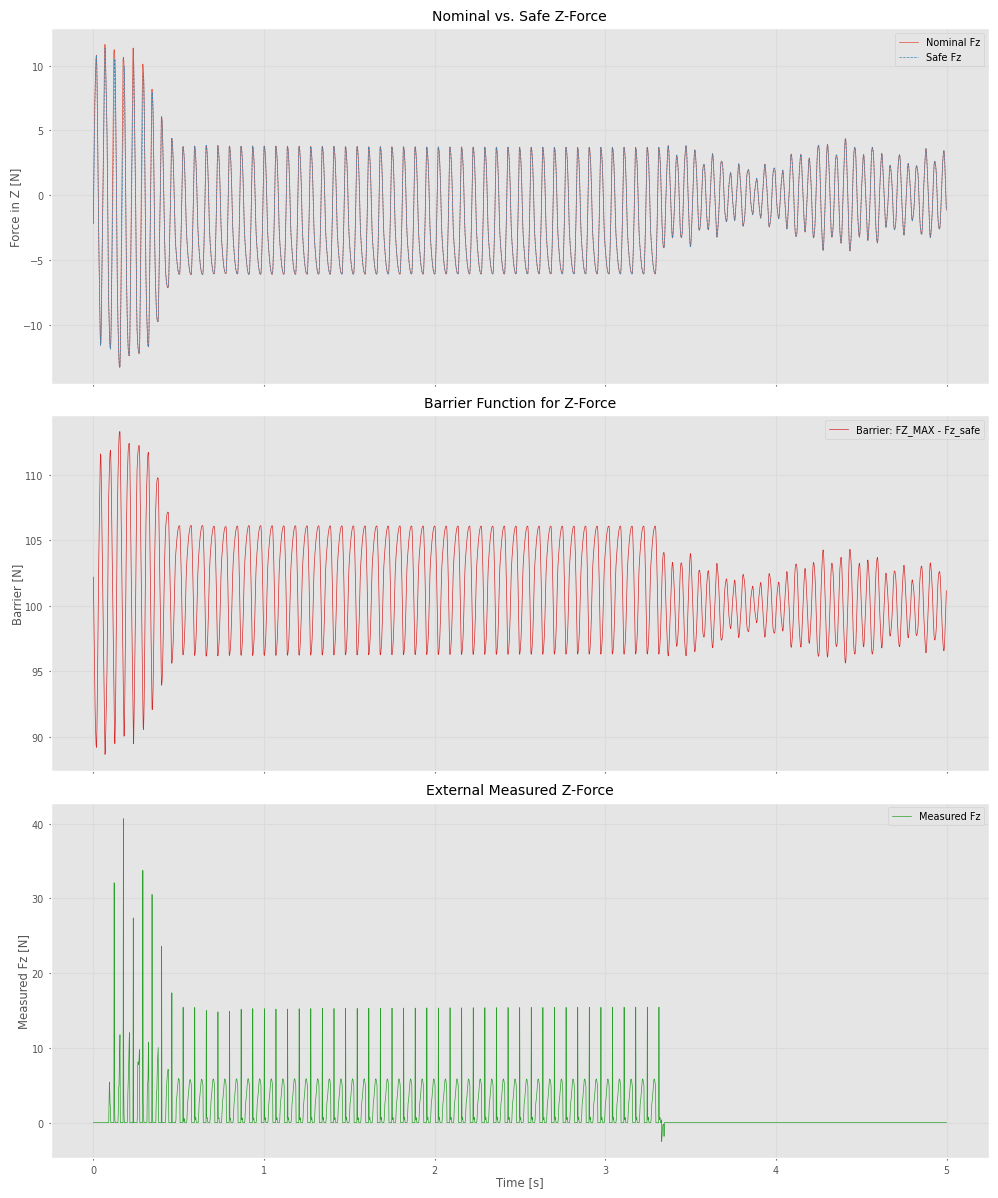

In [145]:
import numpy as np
import mujoco
from tqdm import tqdm
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

# ----------------------------------------------------------------
# CVXOPT settings: Disable solver output for cleaner logs.
solvers.options['show_progress'] = False

# ----------------------------------------------------------------
# Impedance controller parameters
STIFFNESS = np.array([5000, 5000, 5000, 1000, 1000, 1000])
DAMPING_RATIO = 1  # Critical damping
DAMPING = 2 * DAMPING_RATIO * np.sqrt(STIFFNESS)

# Define safe limits for the z-force
FZ_MAX = 100.0   # maximum allowable force in z-direction [N]
FZ_MIN = -100.0  # minimum allowable force in z-direction [N]

# (Optional) compliance vector if needed
compliance_vector = np.array([1, 1, 1, 1, 1, 1])

# CBF parameter (for Lie derivative term)
lambda_cbf = 10.0  # you can tune this value

# Simulation parameters
duration = 5         # seconds
framerate = 30       # Hz
dt = ur5e.m.opt.timestep  # simulation timestep
n_steps = int(np.ceil(duration / dt))
showVideo = True

# ----------------------------------------------------------------
# Logging arrays for z-force and external force measurements
time_log    = []
Fz_nom_log  = np.zeros(n_steps)   # nominal z-force from impedance controller
Fz_safe_log = np.zeros(n_steps)   # safe (projected) z-force
barrier_log = np.zeros(n_steps)    # barrier function h = FZ_MAX - Fz_safe
force_log   = np.zeros((n_steps, 3))  # log external force vector (x,y,z)

# (Other logging such as video frames can be added as needed)
frames = []  # for video capture, if desired

# ----------------------------------------------------------------
# Reset the simulation (assuming ur5e and sol are defined in your context)
mujoco.mj_resetData(ur5e.m, ur5e.d)
ur5e.d.qpos[:] = sol.q
mujoco.mj_forward(ur5e.m, ur5e.d)

progress_bar = tqdm(total=duration)
idx = 0

# Initialize Fz_prev. For the first iteration, we set it to a safe value.
Fz_prev = 0.0

def force_z_cbf_projection(Fz_des, FZ_MAX, FZ_MIN, Fz_prev, dt, lambda_cbf):
    """
    Projects the desired z-force Fz_des onto the safe set while enforcing a
    discrete-time CBF constraint based on the Lie derivative.

    The safe set is defined by FZ_MIN <= Fz <= FZ_MAX and the CBF condition
      (Fz_safe - Fz_prev)/dt <= lambda_cbf*(FZ_MAX - Fz_prev).

    This is implemented by computing an effective upper bound:
      c = min{ FZ_MAX, Fz_prev + dt * lambda_cbf * (FZ_MAX - Fz_prev) }.
    
    The QP then minimizes (1/2)*(Fz_safe - Fz_des)^2 subject to:
         Fz_safe <= c   and   Fz_safe >= FZ_MIN.
    """
    # Compute the extra upper bound from the Lie derivative condition.
    c = min(FZ_MAX, Fz_prev + dt * lambda_cbf * (FZ_MAX - Fz_prev))
    n = 1  # scalar problem
    P = 2 * np.eye(n)
    q = -2 * np.array([Fz_des])
    # Constraints: Fz_safe <= c and -Fz_safe <= -FZ_MIN (i.e. Fz_safe >= FZ_MIN)
    G = np.vstack(( np.array([[1.0]]), np.array([[-1.0]]) ))
    h = np.hstack(( np.array([c]), np.array([-FZ_MIN]) ))
    
    # Convert to cvxopt matrices and solve
    P_cvx = matrix(P)
    q_cvx = matrix(q)
    G_cvx = matrix(G)
    h_cvx = matrix(h)
    sol = solvers.qp(P_cvx, q_cvx, G_cvx, h_cvx)
    Fz_safe = np.array(sol['x']).flatten()[0]
    return Fz_safe

# ----------------------------------------------------------------
# Main simulation loop
while ur5e.d.time < duration and idx < n_steps:
    progress_bar.update(dt)
    
    # Get current end-effector pose and Jacobian
    tcp_pos = ur5e.fkine(ur5e.d.qpos)
    J = ur5e.jacob0(ur5e.d.qpos)
    
    # Set a damping factor for DLS (for robust inversion if needed)
    lambda_damp = 0.01
    if np.abs(np.linalg.det(J)) <= 0.001:
        J_inv = J.T @ np.linalg.inv(J @ J.T + lambda_damp**2 * np.eye(J.shape[0]))
        print("Using damped least squares inversion at time", ur5e.d.time)
    else:
        J_inv = np.linalg.pinv(J)

    # (Optional) Get external forces (e.g., contacts) and log them.
    f_ext = np.zeros(6)
    contact_points, contact_forces, _, _, _ = ur5e.get_contact_info()
    if len(contact_forces):
        f_ext[:3] = contact_forces[0]
    force_log[idx] = f_ext[:3]

    # ----------------------------------------------------------------
    # Define a desired trajectory.
    t = ur5e.d.time
    # Use the current pose as baseline and add a translation offset.
    target_pose = tcp_pos 
    x_diff = [0.1 * (1 - np.cos(n_steps*0.01)), 0, 0.05 * (1 - np.cos(n_steps*0.01)), 0, 0, 0]
    target_pose = tcp_pos * sm.SE3.Trans(x_diff[0], x_diff[1], x_diff[2])
    error_in_base_frame = np.concatenate((target_pose.t - tcp_pos.t, np.zeros(3)))  # 6D error

    # Cartesian velocity error computed from joint velocities
    v_e = J @ ur5e.d.qvel

    # ----------------------------------------------------------------
    # Compute impedance wrench.
    wrench = STIFFNESS * error_in_base_frame - DAMPING * v_e
    # Extract the nominal z-force (3rd element, index 2)
    Fz_nominal = wrench[2]
    
    # Project the nominal z-force using the CBF condition.
    Fz_safe = force_z_cbf_projection(Fz_nominal, FZ_MAX, FZ_MIN, Fz_prev, dt, lambda_cbf)
    
    # Build a safe wrench by replacing only the z-force component.
    wrench_safe = wrench.copy()
    wrench_safe[2] = Fz_safe
    
    # Compute joint torques from the safe wrench.
    tau = J.T @ wrench_safe
    mass_matrix = np.zeros((6, 6))
    mujoco.mj_fullM(ur5e.m, mass_matrix, ur5e.d.qM)
    coriolis_forces = ur5e.d.qfrc_bias.copy()
    tau += mass_matrix @ ur5e.d.qacc + coriolis_forces

    # ----------------------------------------------------------------
    # Log the data.
    time_log.append(t)
    Fz_nom_log[idx]  = Fz_nominal
    Fz_safe_log[idx] = Fz_safe
    # Define barrier as h = FZ_MAX - Fz_safe (which should be >= 0)
    barrier_log[idx] = FZ_MAX - Fz_safe

    # Apply the joint torque command.
    ur5e.d.ctrl[:] = tau

    # (Optional) Capture video frame if desired.
    if len(frames) < ur5e.d.time * framerate:
        renderer.update_scene(ur5e.d, camera="fixed4", scene_option=dict())
        pixels = renderer.render()
        frames.append(pixels)

    # Update simulation and iteration counter.
    mujoco.mj_step(ur5e.m, ur5e.d)
    # Update Fz_prev for the next iteration.
    Fz_prev = Fz_safe
    idx += 1

progress_bar.close()

# ----------------------------------------------------------------
# Plot the results.
time_log = np.array(time_log)

fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Subplot 1: Nominal z-force and Safe z-force
axs[0].plot(time_log, Fz_nom_log, label='Nominal Fz')
axs[0].plot(time_log, Fz_safe_log, label='Safe Fz', linestyle='--')
axs[0].set_ylabel('Force in Z [N]')
axs[0].set_title('Nominal vs. Safe Z-Force')
axs[0].legend(loc='upper right')

# Subplot 2: Barrier function (h = FZ_MAX - Safe Fz)
axs[1].plot(time_log, barrier_log, label='Barrier: FZ_MAX - Fz_safe', color='tab:red')
axs[1].set_ylabel('Barrier [N]')
axs[1].set_title('Barrier Function for Z-Force')
axs[1].legend(loc='upper right')

# Subplot 3: External measured z-force (force_log[:,2])
axs[2].plot(time_log, force_log[:len(time_log), 2], label='Measured Fz', color='tab:green')
axs[2].set_ylabel('Measured Fz [N]')
axs[2].set_xlabel('Time [s]')
axs[2].set_title('External Measured Z-Force')
axs[2].legend(loc='upper right')

plt.tight_layout()
plt.show()

# ----------------------------------------------------------------
# Optionally, show the recorded video
if showVideo:
    media.show_video(frames, fps=framerate)
